In [1]:
import pandas as pd

bow = pd.read_csv('bag_of_words.csv')
sales = pd.read_csv('sales.csv')

In [2]:
# Transpose the dataframe
bow_long = bow.transpose()
bow_long.columns = bow_long.iloc[0]
bow_long = bow_long.drop(bow_long.index[0]).reset_index(names='word')
bow_long.head()

quarter_statement,word,1994Q1,1994Q2,1994Q3,1994Q4,1995Q1,1995Q2,1995Q3,1995Q4,1996Q1,...,2000Q3,2000Q4,2001Q1,2001Q2,2001Q3,2001Q4,2002Q1,2002Q2,2002Q3,2002Q4
0,a.,1.0,0.0,1.0,2.0,2.0,0.0,1.0,2.0,2.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,abstain,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abstent,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
3,acceler,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0
4,accept,4.0,3.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,5.0,1.0,3.0,4.0,3.0,2.0,4.0,3.0,4.0,3.0


In [3]:
sentiment = pd.read_csv('sentiment_afinn.csv')
# To get afinn sentiment value, can also use package and iterate each word
# from afinn import Afinn
# Afinn().score('love')

# Inner merge "bag of words" and "sentiment score"
bow_merge = pd.merge(sentiment, bow_long, how='inner', on='word')
bow_merge.head()

,word,value,1994Q1,1994Q2,1994Q3,1994Q4,1995Q1,1995Q2,1995Q3,1995Q4,...,2000Q3,2000Q4,2001Q1,2001Q2,2001Q3,2001Q4,2002Q1,2002Q2,2002Q3,2002Q4
0,accept,1,4.0,3.0,2.0,2.0,2.0,2.0,2.0,0.0,...,5.0,1.0,3.0,4.0,3.0,2.0,4.0,3.0,4.0,3.0
1,accomplish,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,admit,-1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,adopt,1,10.0,11.0,9.0,0.0,1.0,1.0,1.0,0.0,...,2.0,5.0,7.0,6.0,6.0,4.0,17.0,23.0,30.0,5.0
4,agreement,1,3.0,2.0,0.0,25.0,5.0,5.0,0.0,23.0,...,8.0,33.0,17.0,1.0,18.0,39.0,8.0,7.0,11.0,53.0


Text(0, 0.5, 'Growth of Sales')

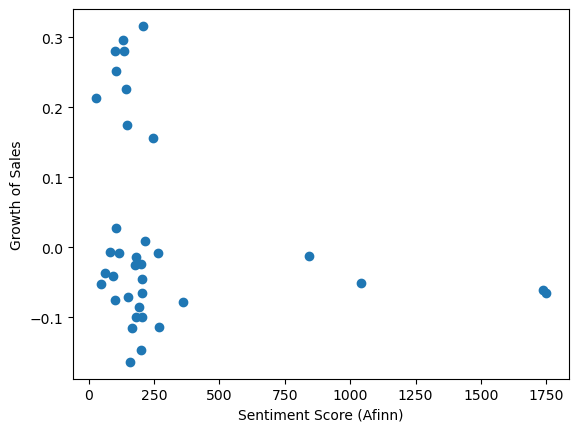

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the sentiment score
# Multiply unit sentiment value by count of each word and sum up
# bow_merge['value']: (vector) 1 * No. of words
# bow_merge.iloc: (matrix) No. of words * No. of quarters
# sentiment_score: (vector) 1 * No. of quarters
sentiment_score = np.dot(bow_merge['value'], bow_merge.iloc[:, 2:])

# Plot the relationship between growth and sentiment score
plt.scatter(x=sentiment_score, y=sales['growth'])
plt.xlabel('Sentiment Score (Afinn)')
plt.ylabel('Growth of Sales')